In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [190]:

#frame blur is the number of frames I want to average together before finding the distance for another averaged frame grou 
# ie, it is the number of frames treated as one for each group

#segment_n is the number of hypotenuses (after averaging) that I want to sum for an estimated distance traveled

#make sure to chose segment_n such that there are enough values in the data set (needs to be less than half the length)

def downsampleddistance(flytraxpath, frame_blur, segment_n):
    
    df1 = pd.read_csv(flytraxpath, skiprows=34, usecols = [0,1,2,3])
    #load the data
    
    #plt.plot(df1['x_px'], df1['y_px'])
    #simple plot for data
    
    df1x= df1['x_px'].values
    df1y= df1['x_px'].values
    #define x and y distances
    
    x_dis = abs((df1x[1:])- (df1x[:-1]))
    y_dis = abs((df1y[1:])- (df1y[:-1]))
    #define changes in x and y distances
    
    time_microseconds=df1['time_microseconds'].values

    x_dismean = np.mean(x_dis[:(len(x_dis)//frame_blur)*frame_blur].reshape(-1,frame_blur), axis=1)
    y_dismean = np.mean(y_dis[:(len(y_dis)//frame_blur)*frame_blur].reshape(-1,frame_blur), axis=1)
    timemean = np.mean(time_microseconds[:(len(time_microseconds)//frame_blur)*frame_blur].reshape(-1,frame_blur), axis=1)
    #create an array for the x and y distances that means over every n numbers, where n is the frame_blur defined earlier; 
    #must reshape the matrix to be divisible by the frame_blur- ie if you have 91 values and you want to mean over every 10 #s
    
    #sanitycheck, set frame_blur to 3
    #print(x_dis[0:15])
    #print(x_dismean[0:5])
    
    ds_hdis = (np.sqrt((x_dismean**2)+(y_dismean**2)))/4.4 
    #calculates the downsampled hypotenuses and converts pixels into mm.
    #radius according to flytrax file is 440 pixels (diameter = 880)... measured arena has diameter of 20cm/200mm. 880pix/200mm = 4.4 pixels per mm 
    total_distance = int(np.sum(ds_hdis))
    
    seg_hdis = ds_hdis[int((len(ds_hdis)/3)):(int((len(ds_hdis)/3)+segment_n))]
    #starts 1/3 into the data and will be the length of the segment you select
    seg_distance = int(np.sum(seg_hdis))
                       
    seg_time = (timemean[int((len(timemean)/3)):(int((len(timemean)/3)+segment_n))]/10**6) #gives the segment of time in seconds
    #sum_seg_hdis = np.sum(seg_hdis)#each flytrax file has  different length... only take average for n values
    
    totaltime = ((time_microseconds[-1])-(time_microseconds[1]))/10**6 #gives total time in seconds
    frame = df1['frame'].values
    frame_freq = totaltime/ int(len(frame)) #is the number of seconds between each frame
    segment_length= (frame_freq)*frame_blur*segment_n #is the length in seconds for the segment
    
    average_speed = ((np.sum(ds_hdis))/(totaltime))*60
    #=average speed in mm/min
    
    average_speed_seg = ((np.sum(seg_hdis))/segment_length)*60
    #average speed for that time segment in mm/min

    #print(frame_freq)
    #print(str(int(average_speed)) + ' mm/min is the average speed for entire recording')
    #print(str(total_distance)+ ' mm traveled for entire recording')
    #print(str(int(average_speed_seg))+ ' mm/min is the average speed for segment length of '+ str(int(segment_length))+ " seconds")
    #print(str(seg_distance)+ ' mm traveled in '+ str(int(segment_length))+ " seconds")
    
    #print(int(average_speed))
    #print(int(np.sum(ds_hdis)))
    #print(int(average_speed_seg))
    #print(int(np.sum(seg_hdis)))

    return int(average_speed_seg), int(average_speed), total_distance, seg_distance
downsampleddistance('/Users/Ashlyn/Documents/Neuroscience/Drosophila/SummaryAcetone/flytrax20191107_123336.csv', 17, 2990) 

#running with frame_blur = 17 would average over every 0.1 seconds; segment_n=2990 would make length of recording ~300 seconds,
#because 0.006 seconds * 17 = 0.102; 0.102 * 2990 = 300


#1)add to program such that these numbers are added to the csv file

(28, 25, 223, 145)

In [191]:
df2 = pd.read_csv("/Users/Ashlyn/Documents/Neuroscience/Drosophila/PinwheelAnalysis/user-docs/analysis/cumulative.csv")
average_speed_list = []
average_speed_seg_list = []
distance_list = []
distance_seg_list = []

length = int(((len(df2))/5))
#list has 349 rows, so there are 70 total files, each with 5 rows.

In [192]:
for i in range(length):
    average_speed_seg, average_speed, total_distance, seg_distance = downsampleddistance((df2['fname'][(5*i)]), 17, 2990)
    for ii in range(5):
        average_speed_list.append(average_speed)
        average_speed_seg_list.append(average_speed_seg)
        distance_list.append(total_distance)
        distance_seg_list.append(seg_distance)
#this goes through the the cumulative file and does for all flytrax files

df2['Average Speed (mm/min)'] = average_speed_list 
df2['Average Speed 300s Segment (mm/min)'] = average_speed_seg_list
df2['Total Distance Traveled (mm)'] =  distance_list
df2['Distance Traveled in 300s Segment (mm)'] =  distance_seg_list


In [189]:
df2.to_csv(r'/Users/Ashlyn/Documents/Neuroscience/Drosophila/SummaryAcetone/cumulativeupdated.csv')

PermissionError: [Errno 13] Permission denied: '/Users/Ashlyn/Documents/Neuroscience/Drosophila/SummaryAcetone/cumulativeupdated.csv'

In [168]:
import pandas as pd
import seaborn as sns

Text(0.5,1,'Control Verification')

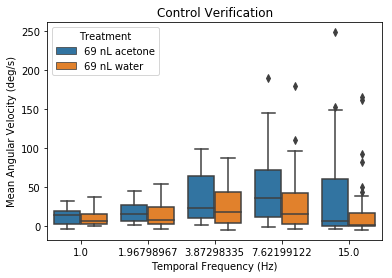

In [169]:
ax= sns.boxplot(x="Temporal Frequency (Hz)", y="Mean Angular Velocity (deg/s)", hue="Treatment", data=df2)
ax.set_title('Control Verification')

#boxplot of all

Text(0.5,1,'Control Verification')

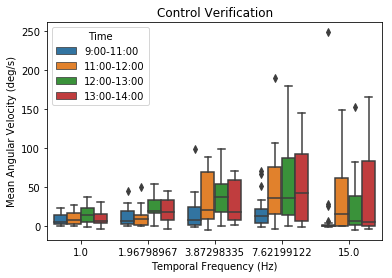

In [170]:
ax= sns.boxplot(x="Temporal Frequency (Hz)", y="Mean Angular Velocity (deg/s)", hue="Time", data=df2)
ax.set_title('Control Verification')

In [171]:
df3= df2.copy()
df3.rename(columns = {'Unnamed: 0':'index'}, inplace = True) 

In [201]:
filterdf3 = df3[(df3['Distance Traveled in 300s Segment (mm)'] > 80) & (df3['Distance Traveled in 300s Segment (mm)'] < 1000) ]
filterdf3= filterdf3[filterdf3.Time != '9:00-11:00']

Text(0.5,1,'Control Verification: Effect of Pinwheel Frequency on Fly Mean Angular Velocity')

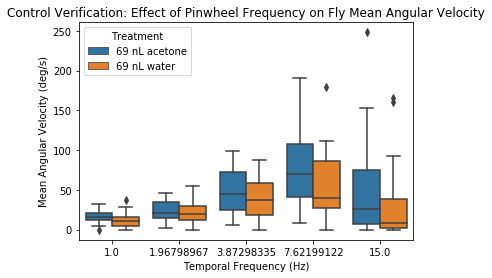

In [194]:
ax= sns.boxplot(x="Temporal Frequency (Hz)", y="Mean Angular Velocity (deg/s)", hue="Treatment", data=filterdf3)
ax.set_title('Control Verification: Effect of Pinwheel Frequency on Fly Mean Angular Velocity')

Text(0.5,1,'Control Verification: Experiment Time Differences')

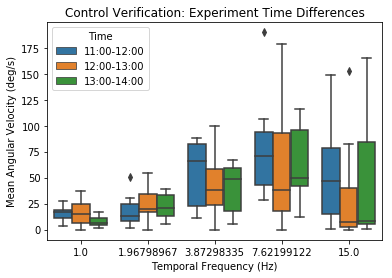

In [202]:
ax= sns.boxplot(x="Temporal Frequency (Hz)", y="Mean Angular Velocity (deg/s)", hue="Time", data=filterdf3)
ax.set_title('Control Verification: Experiment Time Differences')

Text(0.5,1,'Control Verification: Average Speed')

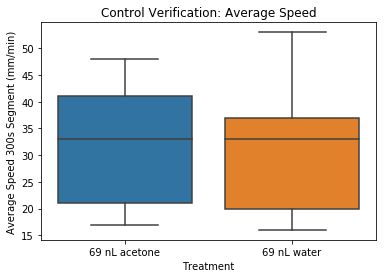

In [196]:
ax= sns.boxplot(x="Treatment", y="Average Speed 300s Segment (mm/min)", data=filterdf3)
ax.set_title('Control Verification: Average Speed')

Text(0.5,1,'Control Verification: Distance Traveled')

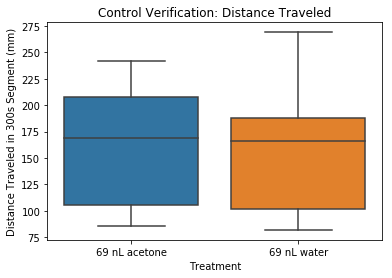

In [197]:
ax= sns.boxplot(x="Treatment", y="Distance Traveled in 300s Segment (mm)", data=filterdf3)
ax.set_title('Control Verification: Distance Traveled')